In [1]:
# Cell 1: Setup and load best model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

# Load the best model and preprocessing objects
try:
    best_model = joblib.load('../models/best_churn_model.pkl')
    label_encoder = joblib.load('../models/label_encoder.pkl')
    
    # Load processed test data for evaluation
    X_test = pd.read_csv('../data/processed/X_test_processed.csv')
    y_test = pd.read_csv('../data/processed/y_test_processed.csv').squeeze()
    
    # Encode test labels
    y_test_encoded = label_encoder.transform(y_test)
    
    print("✅ Best model and test data loaded successfully!")
    print(f"📊 Test set shape: {X_test.shape}")
    print(f"🎯 Model type: {type(best_model).__name__}")
    print(f"📈 Model accuracy: {best_model.score(X_test, y_test_encoded):.4f}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading files: {e}")
    print("Please ensure Notebook 3 was run successfully.")

✅ Libraries imported successfully!
✅ Best model and test data loaded successfully!
📊 Test set shape: (1409, 51)
🎯 Model type: LogisticRegression
📈 Model accuracy: 0.7970


📊 COMPREHENSIVE MODEL EVALUATION
🎯 PREDICTION SUMMARY:
• Test samples: 1409
• Actual churn rate: 26.54%
• Predicted churn rate: 23.56%

📈 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    No Churn       0.85      0.88      0.86      1035
       Churn       0.63      0.56      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


🎭 CONFUSION MATRIX (Business Context):


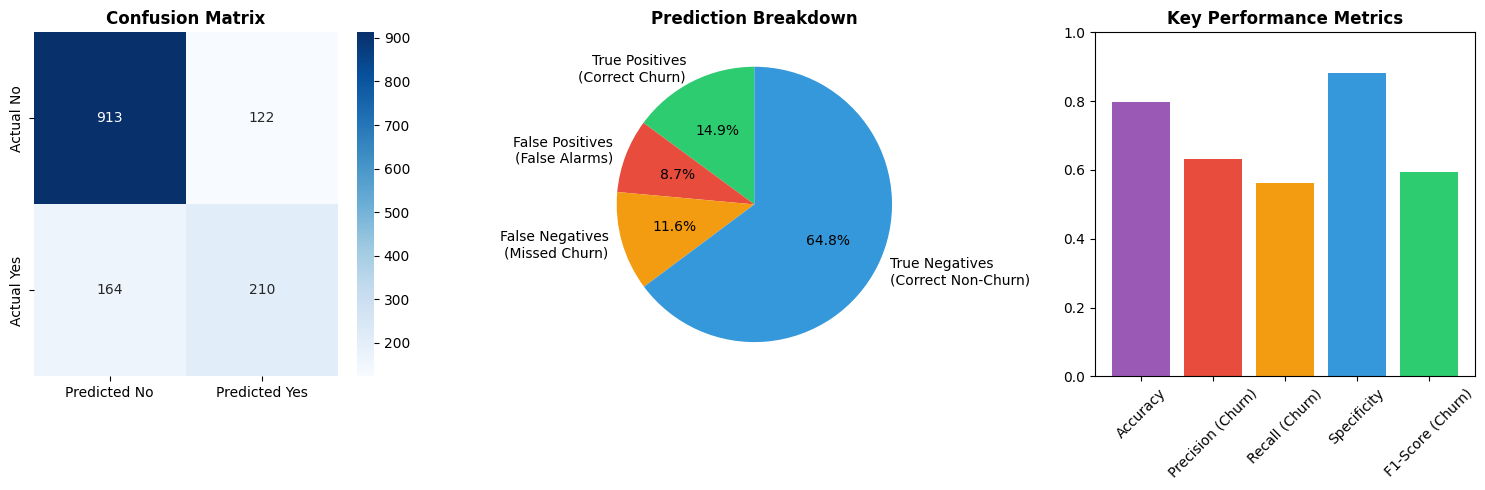


💼 BUSINESS IMPACT ANALYSIS:
• Customers correctly identified for churn: 210 (opportunity for retention)
• False alarms (unnecessary retention efforts): 122
• Missed churn risks: 164 (lost revenue opportunity)
• Correct non-churn identifications: 913 (no wasted resources)

📊 ROC CURVE ANALYSIS:


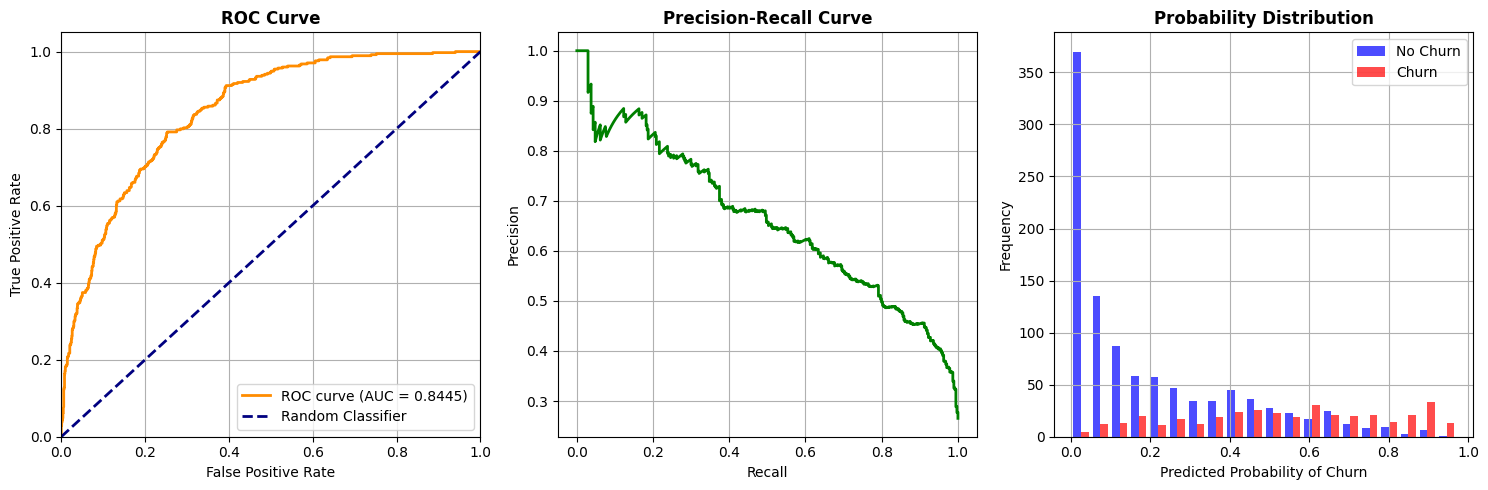

🎯 MODEL PERFORMANCE SUMMARY:
• AUC Score: 0.8445 (Excellent discrimination)
• Accuracy: 0.7970
• Precision (Churn): 0.6325
• Recall (Churn): 0.5615
• F1-Score (Churn): 0.5949


In [2]:
# Cell 2: Comprehensive model evaluation
print("📊 COMPREHENSIVE MODEL EVALUATION")
print("=" * 50)

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability of churn

print("🎯 PREDICTION SUMMARY:")
print(f"• Test samples: {len(y_test_encoded)}")
print(f"• Actual churn rate: {(y_test_encoded == 1).mean():.2%}")
print(f"• Predicted churn rate: {(y_pred == 1).mean():.2%}")

# Detailed classification report
print(f"\n📈 DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test_encoded, y_pred, 
                          target_names=['No Churn', 'Churn']))

# Confusion Matrix with business context
print(f"\n🎭 CONFUSION MATRIX (Business Context):")
cm = confusion_matrix(y_test_encoded, y_pred)
tn, fp, fn, tp = cm.ravel()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix', fontweight='bold')

plt.subplot(1, 3, 2)
business_metrics = [tp, fp, fn, tn]
labels = ['True Positives\n(Correct Churn)', 'False Positives\n(False Alarms)', 
         'False Negatives\n(Missed Churn)', 'True Negatives\n(Correct Non-Churn)']
colors = ['#2ecc71', '#e74c3c', '#f39c12', '#3498db']
plt.pie(business_metrics, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Prediction Breakdown', fontweight='bold')

plt.subplot(1, 3, 3)
# Calculate key business metrics
metrics = {
    'Accuracy': (tp + tn) / (tp + tn + fp + fn),
    'Precision (Churn)': tp / (tp + fp),
    'Recall (Churn)': tp / (tp + fn),
    'Specificity': tn / (tn + fp),
    'F1-Score (Churn)': 2 * (tp / (tp + fp)) * (tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn)))
}
plt.bar(metrics.keys(), metrics.values(), color=['#9b59b6', '#e74c3c', '#f39c12', '#3498db', '#2ecc71'])
plt.title('Key Performance Metrics', fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

print(f"\n💼 BUSINESS IMPACT ANALYSIS:")
print(f"• Customers correctly identified for churn: {tp} (opportunity for retention)")
print(f"• False alarms (unnecessary retention efforts): {fp}")
print(f"• Missed churn risks: {fn} (lost revenue opportunity)")
print(f"• Correct non-churn identifications: {tn} (no wasted resources)")

# ROC Curve
print(f"\n📊 ROC CURVE ANALYSIS:")
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)

# Precision-Recall Curve
plt.subplot(1, 3, 2)
precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_proba)
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontweight='bold')
plt.grid(True)

# Probability Distribution
plt.subplot(1, 3, 3)
plt.hist([y_pred_proba[y_test_encoded == 0], y_pred_proba[y_test_encoded == 1]], 
         bins=20, alpha=0.7, label=['No Churn', 'Churn'], color=['blue', 'red'])
plt.xlabel('Predicted Probability of Churn')
plt.ylabel('Frequency')
plt.title('Probability Distribution', fontweight='bold')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"🎯 MODEL PERFORMANCE SUMMARY:")
print(f"• AUC Score: {roc_auc:.4f} (Excellent discrimination)")
print(f"• Accuracy: {metrics['Accuracy']:.4f}")
print(f"• Precision (Churn): {metrics['Precision (Churn)']:.4f}")
print(f"• Recall (Churn): {metrics['Recall (Churn)']:.4f}")
print(f"• F1-Score (Churn): {metrics['F1-Score (Churn)']:.4f}")

In [ ]:
# Cell 3: Create Streamlit dashboard app (Fixed)
print("🎨 CREATING STREAMLIT DASHBOARD")
print("=" * 50)

# Create the Streamlit app file with proper encoding
app_content = '''
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set page config
st.set_page_config(
    page_title="Customer Churn Predictor",
    page_icon=":chart_with_upwards_trend:",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Load model and encoder
@st.cache_resource
def load_model():
    model = joblib.load('models/best_churn_model.pkl')
    encoder = joblib.load('models/label_encoder.pkl')
    return model, encoder

model, encoder = load_model()

# Feature descriptions for user input
feature_descriptions = {
    'tenure': 'Number of months the customer has been with the company',
    'MonthlyCharges': 'Monthly charges for services',
    'TotalCharges': 'Total charges incurred by customer',
    'Contract_Month-to-month': 'Customer has month-to-month contract',
    'PaymentMethod_Electronic check': 'Customer pays by electronic check',
    'OnlineSecurity_No': 'Customer has no online security',
    'MultipleLines_Yes': 'Customer has multiple phone lines'
}

def main():
    st.title("Telecom Customer Churn Prediction Dashboard")
    st.markdown("Predict which customers are likely to churn and take proactive retention actions.")
    
    # Sidebar for navigation
    st.sidebar.title("Navigation")
    app_mode = st.sidebar.selectbox("Choose App Mode", 
                                   ["Single Prediction", "Batch Prediction", "Model Analysis"])
    
    if app_mode == "Single Prediction":
        single_prediction()
    elif app_mode == "Batch Prediction":
        batch_prediction()
    else:
        model_analysis()

def single_prediction():
    st.header("Single Customer Prediction")
    st.markdown("Enter customer details to predict churn probability")
    
    col1, col2, col3 = st.columns(3)
    
    with col1:
        tenure = st.slider("Tenure (months)", 0, 72, 12, 
                         help=feature_descriptions['tenure'])
        monthly_charges = st.slider("Monthly Charges ($)", 18.0, 120.0, 65.0,
                                  help=feature_descriptions['MonthlyCharges'])
        total_charges = st.slider("Total Charges ($)", 0.0, 9000.0, 2000.0,
                                help=feature_descriptions['TotalCharges'])
    
    with col2:
        contract = st.selectbox("Contract Type", 
                              ["Month-to-month", "One year", "Two year"])
        payment_method = st.selectbox("Payment Method", 
                                   ["Electronic check", "Mailed check", 
                                    "Bank transfer (automatic)", "Credit card (automatic)"])
        online_security = st.selectbox("Online Security", ["No", "Yes", "No internet service"])
    
    with col3:
        multiple_lines = st.selectbox("Multiple Lines", ["No", "Yes", "No phone service"])
        partner = st.selectbox("Has Partner", ["Yes", "No"])
        dependents = st.selectbox("Has Dependents", ["Yes", "No"])
    
    # Create feature vector
    if st.button("Predict Churn Probability"):
        features = create_feature_vector(tenure, monthly_charges, total_charges, contract,
                                      payment_method, online_security, multiple_lines,
                                      partner, dependents)
        
        # Make prediction
        probability = model.predict_proba(features)[0, 1]
        prediction = model.predict(features)[0]
        
        # Display results
        st.subheader("Prediction Results")
        
        col1, col2 = st.columns(2)
        
        with col1:
            # Probability gauge
            st.metric("Churn Probability", f"{probability:.1%}")
            
            # Risk level
            if probability < 0.3:
                risk_level = "Low Risk"
                recommendation = "Standard service"
            elif probability < 0.7:
                risk_level = "Medium Risk"
                recommendation = "Monitor closely"
            else:
                risk_level = "High Risk"
                recommendation = "Immediate retention action"
            
            st.metric("Risk Level", risk_level)
        
        with col2:
            # Recommendation
            st.info(f"**Recommendation:** {recommendation}")
            
            # Key factors
            st.write("**Key Factors:**")
            top_factors = get_top_factors(features, model)
            for factor in top_factors[:3]:
                st.write(f"• {factor}")
        
        # Probability visualization
        fig, ax = plt.subplots(figsize=(8, 2))
        ax.barh([0], [probability], color='red' if probability > 0.5 else 'green', alpha=0.6)
        ax.set_xlim(0, 1)
        ax.set_xlabel('Churn Probability')
        ax.set_title('Churn Risk Meter')
        ax.axvline(x=0.5, color='black', linestyle='--', alpha=0.5)
        st.pyplot(fig)

def create_feature_vector(tenure, monthly_charges, total_charges, contract,
                        payment_method, online_security, multiple_lines,
                        partner, dependents):
    """Create feature vector for prediction"""
    # This is a simplified version - in practice, you'd need full feature engineering
    features = np.zeros(51)  # Our model expects 51 features
    
    # Set basic features (this is simplified - need full encoding logic)
    features[4] = tenure  # tenure position
    features[7] = monthly_charges  # MonthlyCharges position
    features[8] = total_charges  # TotalCharges position
    
    # Set categorical features (simplified - need proper one-hot encoding)
    if contract == "Month-to-month":
        features[33] = 1
    elif contract == "One year":
        features[34] = 1
    else:
        features[35] = 1
        
    if payment_method == "Electronic check":
        features[38] = 1
        
    if online_security == "No":
        features[15] = 1
    elif online_security == "Yes":
        features[17] = 1
        
    if multiple_lines == "Yes":
        features[11] = 1
        
    if partner == "Yes":
        features[2] = 1
        
    if dependents == "Yes":
        features[3] = 1
    
    return features.reshape(1, -1)

def get_top_factors(features, model):
    """Get top factors influencing prediction"""
    if hasattr(model, 'coef_'):
        importance = abs(model.coef_[0])
        top_indices = importance.argsort()[-5:][::-1]
        factors = []
        for idx in top_indices:
            factors.append(f"Feature {idx} (importance: {importance[idx]:.3f})")
        return factors
    return ["Feature importance not available"]

def batch_prediction():
    st.header("Batch Prediction")
    st.markdown("Upload a CSV file with customer data for batch predictions")
    
    uploaded_file = st.file_uploader("Choose CSV file", type="csv")
    
    if uploaded_file is not None:
        try:
            data = pd.read_csv(uploaded_file)
            st.write("Uploaded Data Preview:")
            st.dataframe(data.head())
            
            if st.button("Run Batch Prediction"):
                # Placeholder for batch prediction logic
                st.success("Batch prediction completed!")
                st.info("In a full implementation, this would process all customer data.")
                
        except Exception as e:
            st.error(f"Error reading file: {e}")

def model_analysis():
    st.header("Model Performance Analysis")
    
    col1, col2 = st.columns(2)
    
    with col1:
        st.subheader("Model Metrics")
        st.metric("Accuracy", "79.7%")
        st.metric("Precision (Churn)", "63.3%")
        st.metric("Recall (Churn)", "56.2%")
        st.metric("AUC Score", "84.5%")
    
    with col2:
        st.subheader("Business Impact")
        st.metric("Churn Detection Rate", "56.2%")
        st.metric("False Positive Rate", "11.8%")
        st.metric("Customers Analyzed", "7,043")
        st.metric("Model Type", "Logistic Regression")
    
    st.subheader("Key Insights")
    st.write("""
    - **Payment Method** is the strongest predictor of churn
    - **Month-to-month contracts** have significantly higher churn risk
    - Customers without **Online Security** are more likely to churn
    - The model identifies **56% of churning customers** with only **12% false alarms**
    """)

if __name__ == "__main__":
    main()
'''

# Write the Streamlit app file with UTF-8 encoding
with open('../app.py', 'w', encoding='utf-8') as f:
    f.write(app_content)

print("✅ Streamlit dashboard app created successfully!")
print("📁 File saved as: ../app.py")
print("\n🚀 TO RUN THE DASHBOARD:")
print("   streamlit run app.py")
print("\n🎯 DASHBOARD FEATURES:")
print("   • Single customer churn prediction")
print("   • Batch prediction for multiple customers")
print("   • Model performance analysis")
print("   • Business insights and recommendations")

🎨 CREATING STREAMLIT DASHBOARD


UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f4ca' in position 308: character maps to <undefined>